<a href="https://colab.research.google.com/github/SreeVarshiniPettugadi/Task-1/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Step 2: Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Step 3: Basic Exploration
print(" Dataset Info:")
df.info()

print("\n First 5 Rows:")
print(df.head())

print("\n Missing Values:")
print(df.isnull().sum())

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3 

In [11]:
# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-11-366098542.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-11-366098542.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [12]:
# One-Hot Encoding for 'Sex' and 'Embarked' (nominal)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [13]:
# Features to scale
scale_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Apply StandardScaler
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

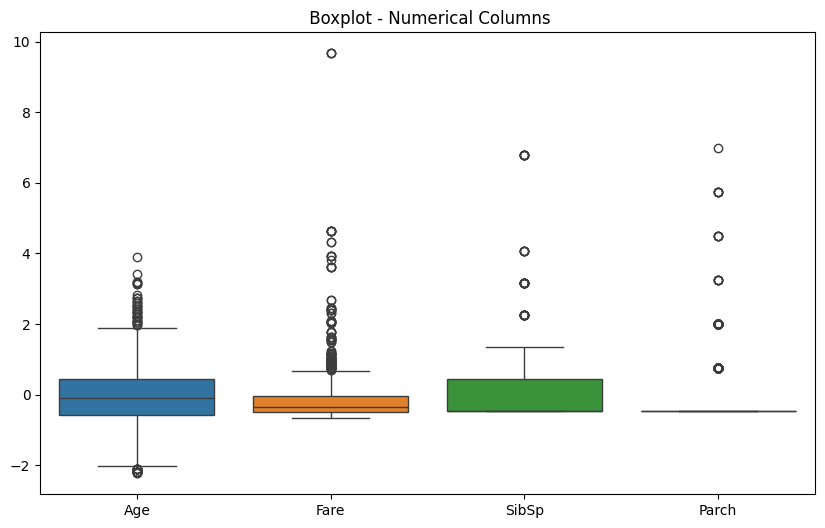

In [14]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[scale_cols])
plt.title(" Boxplot - Numerical Columns")
plt.show()

# IQR method
Q1 = df[scale_cols].quantile(0.25)
Q3 = df[scale_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within IQR range
df_clean = df[~((df[scale_cols] < (Q1 - 1.5 * IQR)) | (df[scale_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
print(" Final Shape of Cleaned Data:", df_clean.shape)
print("\n Sample Cleaned Data:")
print(df_clean.head())

 Final Shape of Cleaned Data: (577, 12)

 Sample Cleaned Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name       Age     SibSp     Parch  \
0                       Braund, Mr. Owen Harris -0.565736  0.432793 -0.473674   
2                        Heikkinen, Miss. Laina -0.258337 -0.474545 -0.473674   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312  0.432793 -0.473674   
4                      Allen, Mr. William Henry  0.433312 -0.474545 -0.473674   
5                              Moran, Mr. James -0.104637 -0.474545 -0.473674   

             Ticket      Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445      True       False        True  
2  STON/O2. 3101282 -0.488854     False       False        True  
3            113803  0.420730     F